In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

seaborn.set_context('talk')

In [ ]:
#Lectura del dataset
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

Acotamos el dataset para los rangos de sueldos que fueron sacados en el punto 1, 20.000 pesos como mínimo, siendo este el salario mínimo vital y móvil del 2020 y como máximo $130.000. 

In [ ]:
#Se crea un df sin outliers que se definieron en los puntos anteriores 

df_modif = df[(df['salary_monthly_NETO'] >= 20000) & (df['salary_monthly_NETO']<=130000 )]
df_modif

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,...,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,Hombre,32,Argentina,Provincia de Buenos Aires,13.0,0.0,3.0,0,Secundario,Completado,...,Jamás,Heterosexual,NaN,No,101-200,Servicios / Consultoría de Software / Digital,9,9,"Abono de celular, Clases de gimnasia online, C...",NaN
6089,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,10.0,3.0,0.0,0,Universitario,Completado,...,En mi trabajo actual,Heterosexual,NaN,NaN,2001-5000,Otras industrias,7,8,"Capacitaciones y/o cursos, Clases de gimnasia ...",NaN
6090,Hombre,37,Argentina,Ciudad Autónoma de Buenos Aires,13.0,6.0,6.0,0,Terciario,Completado,...,En mi trabajo actual,Heterosexual,NaN,No,501-1000,Otras industrias,7,8,Viáticos,NaN
6091,Hombre,38,Argentina,Ciudad Autónoma de Buenos Aires,12.0,5.0,5.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,2001-5000,Otras industrias,8,10,"Abono de celular, Capacitaciones y/o cursos, D...",NaN


Se desea discretizar la población de programadores según su género.
El grupo "Otros" representa el 0.05% del total, por lo que se decidió no agregarlo a la información de la presentación del "twitter / posteo de linkedin"
Por lo tanto Hombres representa cerca del 84% mientras que mujeres el 16%
Nota: en la presentación donde se muestra en cantidad de personas 84% es representado como 8 de cada 10 personas, ya que el programa utilizado no permitía resaltar parcialmente una figura humana.

In [ ]:
profile_gender_count = df_modif.profile_gender.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'Province', 'profile_gender': 'frequency'})
profile_gender_count.sort_values(by='frequency', ascending=False)


,Province,frequency
0,Hombre,3998
1,Mujer,782
2,Otros,21


Una vez definido el dataset, lo que se procede a realizar es mostrar la frecuencia con la que aparecen cada una de las provincias o ciudades. Para facilitar la lectura, se ordena de mayor a menor. Una vez hecho esto, se decidió tomar un TOP 5 de las ciudades / provincias con mayor cantidad de programadores.

,Province,frequency
0,Ciudad Autónoma de Buenos Aires,2950
1,GBA,399
2,Provincia de Buenos Aires,395
3,Córdoba,355
4,Santa Fe,295
5,Mendoza,90
6,Entre Ríos,50
7,Río Negro,34
8,Neuquén,30
9,Tucumán,29


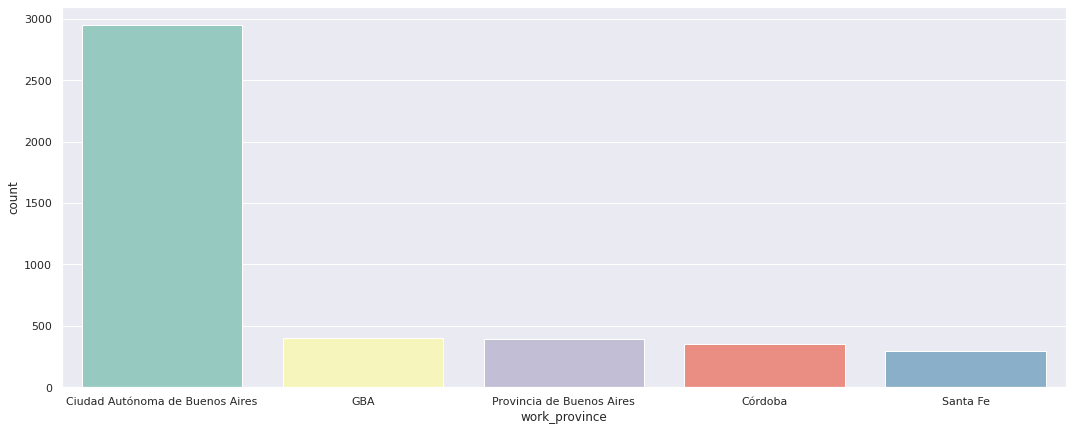

In [ ]:
province_count = df_modif.work_province.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'Province', 'work_province': 'frequency'})
 
seaborn.set_theme(style="darkgrid")
plt.figure(figsize=(18,7))
seaborn.countplot(x="work_province",data=df_modif, order=df_modif.work_province.value_counts().iloc[:5].index,palette="Set3")
province_count.sort_values(by='frequency', ascending=False)

Se tomó un dataset que contenga solamente las columnas que eran de interés, en este caso se decidió analizar la satisfacción de los programadores según las provincias, y agregado a eso, compararlo con la del país. 

In [ ]:
df_top_5 = df_modif.iloc[:,[3,29]]
df_top_5.groupby(by="work_province").mean()
df_top_5_satisfaction=df_modif[["work_province","salary_monthly_NETO","salary_satisfaction"]]
df_top_5_satisfaction.groupby("work_province").mean()


,salary_monthly_NETO,salary_satisfaction
work_province,,
Catamarca,48133.333333,2.000000
Chaco,56962.681818,2.181818
Chubut,79700.000000,2.533333
Ciudad Autónoma de Buenos Aires,76189.989373,2.529153
Corrientes,68566.571429,2.642857
Córdoba,69697.208141,2.509859
Entre Ríos,61189.432200,2.300000
Formosa,58862.000000,2.750000
GBA,69947.678521,2.473684
